$$ DFS $$

DFS is the depth first search. It is an algorithm for searching or traversing the tree or graph data structure. It starts at the root node and explores as far as possible along each branch before backtracking.

*   A problem graph, containg the start node S and the goal node G.
*   A strategy, describing the manner in which the graph will be traversed to get to G.
*  Here is a visited_list that stores the all exploring the node.
*  A tree, that results while traversing to the goal node.

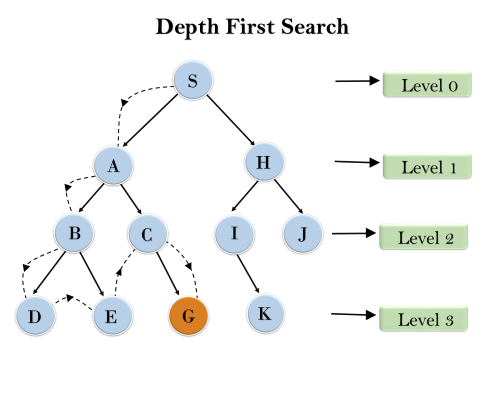




In [59]:
# Making Adjacency list by using csv file ('random_connected_graph.csv')
import pandas as pd
from time import time
import sys 
# Read the CSV file into a DataFrame
df = pd.read_csv('random_connected_graph.csv')

# Create an empty dictionary for the adjacency list
adj_list = {}

# Iterate through the DataFrame
for row in df.itertuples(index=False):
    node1 = row.node1
    node2 = row.node2
    route_distance = row.route_distance

    # Check if node1 is already in the adjacency list
    if node1 in adj_list:
        adj_list[node1].append((node2, route_distance))
    else:
        adj_list[node1] = [(node2, route_distance)]

print(adj_list)


{'Agra': [('Gaya', 871), ('Madhepura', 970), ('Belagavi', 1561), ('Jodhpur', 570), ('Pakur', 1218), ('Durgapur', 1104), ('Chitrakoot', 426), ('Balaghat', 793)], 'Aligarh': [('Rajsamand', 619), ('Patna', 842), ('Una', 505), ('Bundi', 453), ('Madhepura', 973), ('Belagavi', 1660), ('Hanamkonda', 1350), ('Delhi', 163), ('Pakur', 1221), ('Bikaner', 525), ('Ghazipur', 680)], 'Araria': [('Rajsamand', 1635), ('Patna', 313), ('Gaya', 396), ('Kota', 1396), ('Sikar', 1448), ('Prayagraj', 673), ('Daudnagar', 417), ('Hanamkonda', 1647), ('Sitamarhi', 238), ('Sitapur', 853), ('Delhi', 1275), ('Faridabad', 1272), ('Pakur', 236), ('Baghpat', 1278), ('Ghazipur', 470), ('Sri Ganganagar', 1716), ('Balaghat', 1210)], 'Arrah': [('Lucknow', 452), ('Sikar', 1138), ('Bhopal', 940), ('Bundi', 1118), ('Sarangarh', 639), ('Lakhimpur', 595), ('Delhi', 964), ('Faridabad', 961), ('Mahoba', 557), ('Pakur', 432), ('Sagar', 772), ('Nawada', 155), ('Ghazipur', 122), ('Jaipur', 1024), ('Chitrakoot', 445), ('Jehanabad', 

In [60]:
start_node = input("Enter the starting or root node :")
target_node = input("Enter the goal node :")

In [61]:
print(start_node, target_node)

Agra Chitrakoot


In [62]:
# Finding path by using DFS algorithm.
start_time = time()
visited_list = [] # List to keep track of the nodes visited in the graph.
path_list = []  # This stores the path followed to search for target node.
def DFS(start_node, target_node):
  """
  It displays the list of all targeting path node.
  Parameter node1 : It is the root node of graph or tree.
  Parameter node2 : It checks our targeting node, which we want to find in the graph or tree.
  Preconndition node1 : It should be valid key or node of graph.
  Precondition node2 : It should be valid key or node of graph.
  """
  if start_node not in visited_list:
    visited_list.append(start_node)  #Appending node to visited list.
    path_list.append(start_node)
    if start_node == target_node: # checking for target node
      return True
    
    for node in adj_list[start_node]:
      if node[0] not in visited_list:
        if DFS(node[0], target_node):
          return True # Stopping further looping if target found
    path_list.pop()  #Removing element from path while backtracking.
  return False

DFS(start_node, target_node)
print(path_list)
print(len(path_list))
space = sys.getsizeof(path_list+visited_list)
print(space)
end_time = time()
print(end_time-start_time)

['Agra', 'Gaya', 'Araria', 'Rajsamand', 'Aligarh', 'Patna', 'Bikaner', 'Belagavi', 'Sikar', 'Arrah', 'Lucknow', 'Balaghat', 'Bundi', 'Lakhimpur', 'Calicut', 'Kota', 'Durgapur', 'Daudnagar', 'Chitrakoot']
19
360
0.00042319297790527344


$$BFS$$
The Breadth First Search (BFS) algorithm is used to search a graph data structure for a node that meets a set of criteria. It starts at the root of the graph and visits all nodes at the current depth level before moving on to the nodes at the next depth level.



*   It searches level by level of graph or tree.
*   In BFS, We search the tree by levels start from level 0 go to the level 1 then level 2 and so on.

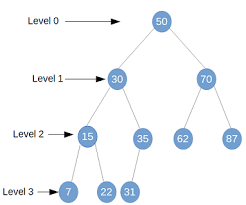







*   Algorithm has three component -
*   Graph Traversal : We will traverse the whole graph or tree . In addition we will take as an input node.
*   We take two nodes, find the second node by using BFS and we will stop to traverse after getting node in the graph.
*   We will create the list to store the path of node1 to node2





In [63]:
# BFS, Finding target path

start_time = time()
space = 0
def BFS_target(node1, node2):
    queue_list = [[node1]]
    visited_list = [node1]
    global space
    while queue_list:
        path = queue_list.pop(0)
        current_node = path[-1]
        
        if current_node == node2:
            space += sys.getsizeof(path+visited_list+queue_list)
            
            return path  # Return the path when the target node is reached

        for neighbor in adj_list[current_node]:
            if neighbor[0] not in visited_list:
                visited_list.append(neighbor[0])
                new_path = list(path)  # Create a copy of the current path
                new_path.append(neighbor[0])
                # space += sys.getsizeof(new_path)
                queue_list.append(new_path)

    return None  # If no path is found, return None


print(BFS_target(start_node, target_node))

end_time = time()
print(space)
print(end_time-start_time)

['Agra', 'Chitrakoot']
648
0.00029778480529785156


$$ A Star \quad Algorithm $$
* A* Search algorithm is one of the best and popular technique used in path-finding and graph traversals.

* Informally speaking, A* Search algorithms, unlike other traversal techniques, it has “brains”. What it means is that it is really a smart algorithm which separates it from the other conventional algorithms. This fact is cleared in detail in below sections.
And it is also worth mentioning that many games and web-based maps use this algorithm to find the shortest path very efficiently (approximation).

* Consider a square grid having many obstacles and we are given a starting cell and a target cell. We want to reach the target cell (if possible) from the starting cell as quickly as possible. Here A* Search Algorithm comes to the rescue.
What A* Search Algorithm does is that at each step it picks the node according to a value-‘f’ which is a parameter equal to the sum of two other parameters – ‘g’ and ‘h’. At each step it picks the node/cell having the lowest ‘f’, and process that node/cell.
We define ‘g’ and ‘h’ as simply as possible below

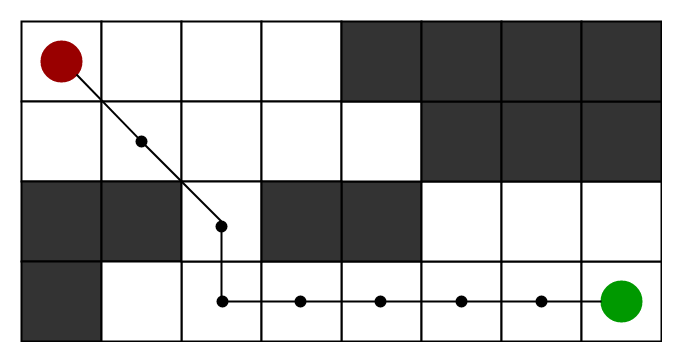

* f = g + h

* g = the movement cost to move from the starting point to a given square on the grid, following the path generated to get there.


* h = the estimated movement cost to move from that given square on the grid to the final destination. This is often referred to as the heuristic, which is nothing but a kind of smart guess. We really don’t know the actual distance until we find the path, because all sorts of things can be in the way (walls, water, etc.). There can be many ways to calculate this ‘h’ which are discussed in the later sections.






In [64]:
# Finding Heuristic distance for implementing A* as well as GBFS

# Reading the complete graph
df2 = pd.read_csv('complete_graph.csv')

# Create a DataFrame containing only the rows that match the goal_node in df2
heuristic_df = df2[df2['node2'] == target_node]

# Create a dictionary of heuristic distances
h = dict(zip(heuristic_df['node1'], heuristic_df[ 'Heuristic distance']))


In [65]:
# Create a dictionary to store the cost of reaching each node from the start node
start_time = time()
space = 0
g = {node: float('inf') for node in adj_list}
g[start_node] = 0

# Create a dictionary to store the estimated total cost from the start node to the goal node
f = {node: float('inf') for node in adj_list}
f[start_node] = h[start_node]  # Assuming h is the heuristic function

# Create a dictionary to store the parent of each node
parent = {node: None for node in adj_list}

open_list = [start_node]

while open_list:
    # Find the node with the lowest f value in the open list
    current_node = min(open_list, key=lambda node: f[node])
    open_list.remove(current_node)

    if current_node == target_node:
        # Reconstruct the path
        path = []
        while current_node is not None:
            path.append(current_node)
            current_node = parent[current_node]
        path.reverse()
        print(path)
        space += sys.getsizeof(path+open_list) + sys.getsizeof(f) + sys.getsizeof(g) + sys.getsizeof(parent)
        
        break

    for neighbor, cost in adj_list[current_node]:
        tentative_g = g[current_node] + cost
        if tentative_g < g[neighbor]:
            # This path to the neighbor is better than any previous one, update the values
            parent[neighbor] = current_node
            g[neighbor] = tentative_g
            f[neighbor] = g[neighbor] + h[neighbor]  # Assuming h is the heuristic function

            if neighbor not in open_list:
                open_list.append(neighbor)

print(space)
end_time = time()
print(end_time-start_time)

['Agra', 'Chitrakoot']
6944
0.0005881786346435547


**Greedy Best first search algorithm**

Greedy Best-First Search is an AI algorithm that attempts to find the most promising path from a given starting point to goal. It priorities paths that appear to be the most promising, regardless of weather or not they are actually the shortest path. The algorithm works by evaluating the cost of each possible path and then expanding the path with the lowest cost. This process is repeated until the goal is reached.

**How Greedy Best- First Search Works ?**


*   Greedy Best-First Search works by evaluating the cost of each possible path and then expanding the path with the lowest cost. This process is repeated until the goal is reached.
*   The algorithm uses a heuristic function to determine which path is the most promising.

* The heuristic function takes into account the cost of the current path and the estimated cost of the remaining paths.

* If the cost of the current path is lower than the estimated cost of the remaining paths, then the current path is chosen. This process is repeated until the goal is reached.



In [66]:
# Finding path by using GBFS algo.
start_time = time()
path = [start_node] # This stores the path followed to search for target node.
def GBFS(node1, node2):
  if node1 == node2: # It checks that we are getting taget node or not.
    return
  else:
    flag = True
    for i in adj_list[node1]:
      if flag: # here flag is only stores first node of expanded node.
        min = i[0]
        flag = False
      if h[i[0]] < h[min]: # here h is heuristic function that gives the heuristic distance.
        min = i[0]
    path.append(min)
    GBFS(min, node2)
    
  
GBFS(start_node, target_node)

if target_node not in path:
  print("Path is not found.")
else:
  print(path)
space = sys.getsizeof(path)
print(space)
end_time = time()
print(end_time-start_time)

['Agra', 'Chitrakoot']
0.0005881786346435547
